# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [177]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [178]:
df = pd.read_csv(r"C:\Users\HUAWEI\Desktop\IronHack Bootcamp\LABS\WEEK2\day2\Extra lab\lab-ml-and-linear-regression\data\california_housing.csv")

# take a look at the dataset
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [179]:
df.iloc[0:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [180]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [181]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [182]:
print(df.shape)
print("*"*50)
print(df.columns)
print("*"*50)
df.isnull().sum()



(20640, 10)
**************************************************
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
**************************************************


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [183]:
non_numeric = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric)

Non-numeric columns: Index(['ocean_proximity'], dtype='object')


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

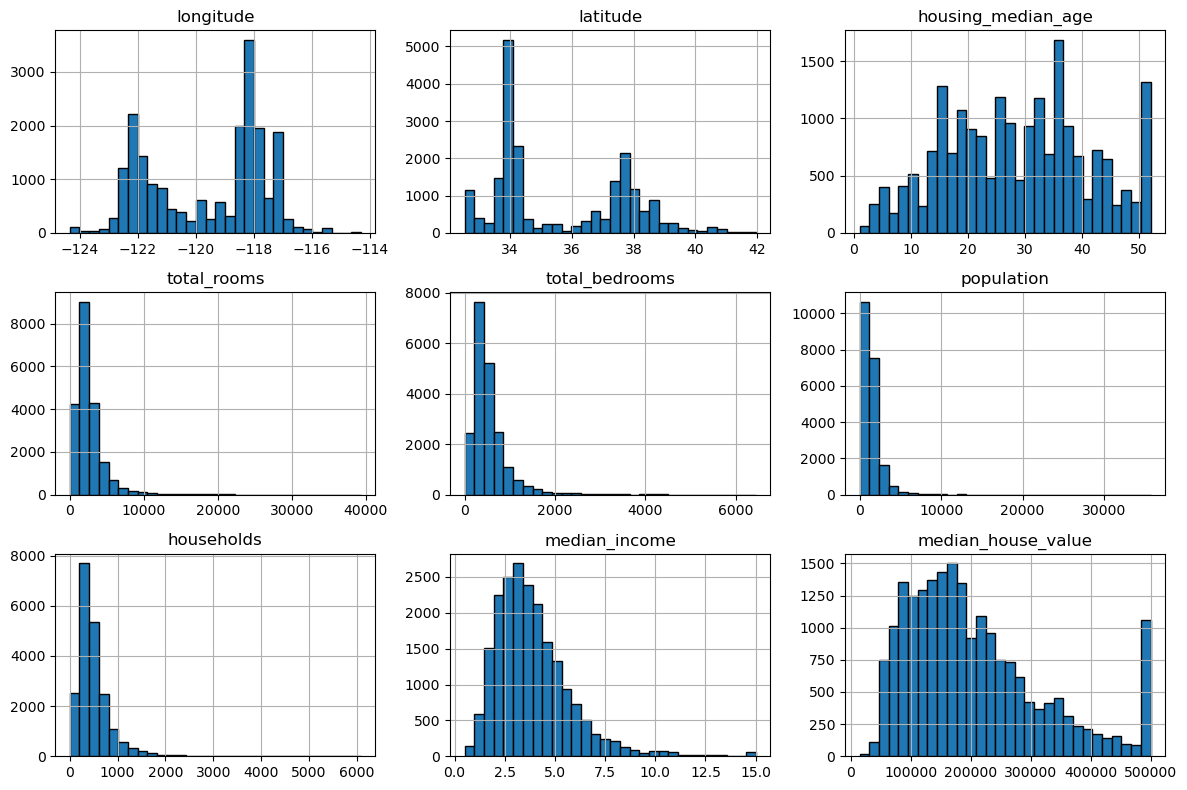

In [184]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [185]:
# want to check if i have a null values 
print(df.isnull().sum())
# column ["total_bedrooms "] has 207 nulls 


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [204]:
df=df.dropna()
print(df.isnull().sum())
# after you run this cell you will clean the null values from column ["total_bedrooms "]
# you can see now it contain 0 null values :)


longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
population_per_household    0
bedrooms per room           0
income_cat                  0
dtype: int64


In [187]:
print(df.isnull().values.any())
# Returns True if there are any NaN values, False otherwise.
# But because I'm a lucky i git False :)
# now we doubled check the DataFrame we have is clean From Nulls values 



False


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [188]:
#"rooms per household"
df["rooms_per_household"] = df["total_rooms"] / df["households"]
#"population per household"
df["population_per_household"] = df["population"] / df["households"]
#"bedrooms per room"
df["bedrooms per room"] = df["total_bedrooms"] / df["total_rooms"]


In [189]:
df.head()  # Show the first few rows with our new columns 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms per room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [190]:
print(df["rooms_per_household"].min())
print(df["rooms_per_household"].max())
# look at the min and the max for column ["rooms_per_household"]
# there is huge difference between them 
# but look at the min ,25% ,50% ,75% 
print(df["rooms_per_household"].describe())
#does not look weird, but the max value is definitely an outlier 	 



0.8461538461538461
141.9090909090909
count    20433.000000
mean         5.431344
std          2.482946
min          0.846154
25%          4.441441
50%          5.230769
75%          6.052381
max        141.909091
Name: rooms_per_household, dtype: float64


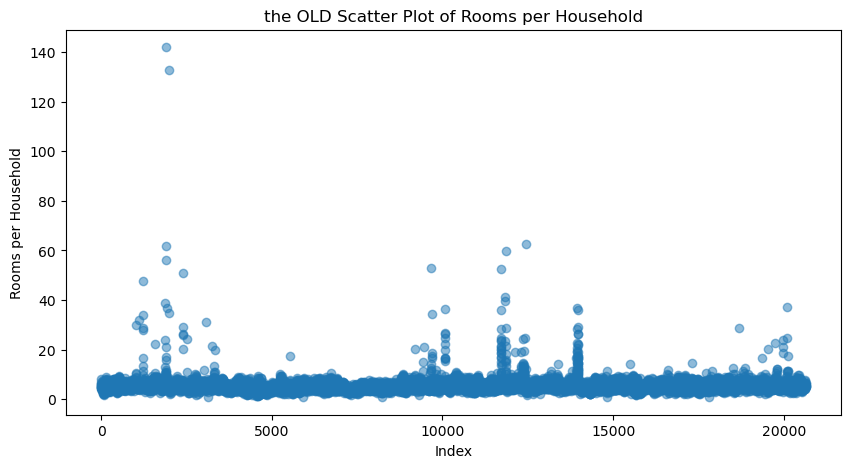

In [191]:
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df["rooms_per_household"], alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Rooms per Household")
plt.title("the OLD Scatter Plot of Rooms per Household")
plt.show()
# a Scatter Plot graph to show the outlier 

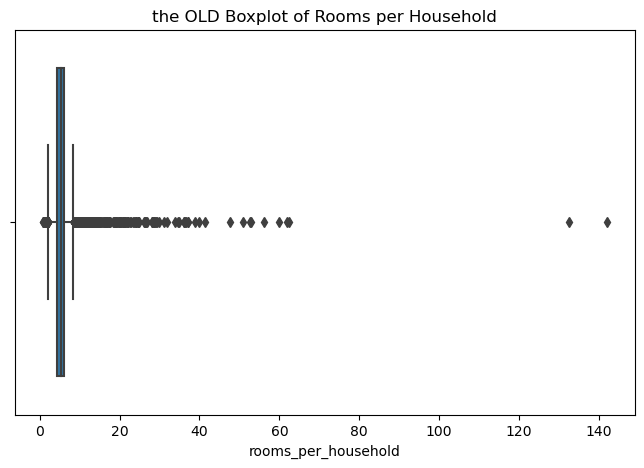

In [192]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["rooms_per_household"])
plt.title("the OLD Boxplot of Rooms per Household")
plt.show()
# look at this one too

In [205]:
#Step 1: Find the Index of the Outlier
outlier_index = df["rooms_per_household"].idxmax()  # Get the index of the max value
print("Outlier index:", outlier_index)
#Step 2: Drop the Outlier
df = df.drop(index=outlier_index)
# *******RUN THIS TWO (2) TIMES TO BECAUSE WE ONLY HAVE (2) OUTLIERS****************#


Outlier index: 1979


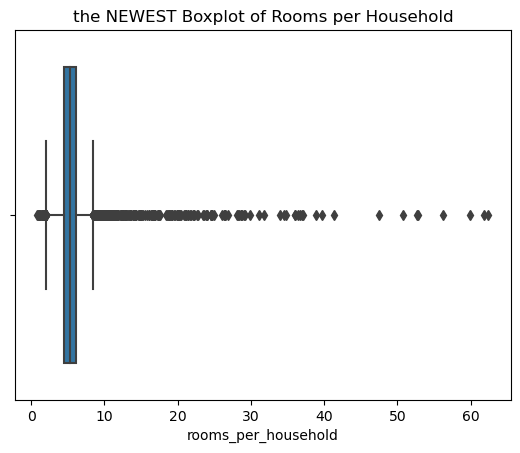

In [206]:
#the updated Boxplot after we remove the outliers
sns.boxplot(x=df["rooms_per_household"])
plt.title("the NEWEST Boxplot of Rooms per Household")
plt.show()


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

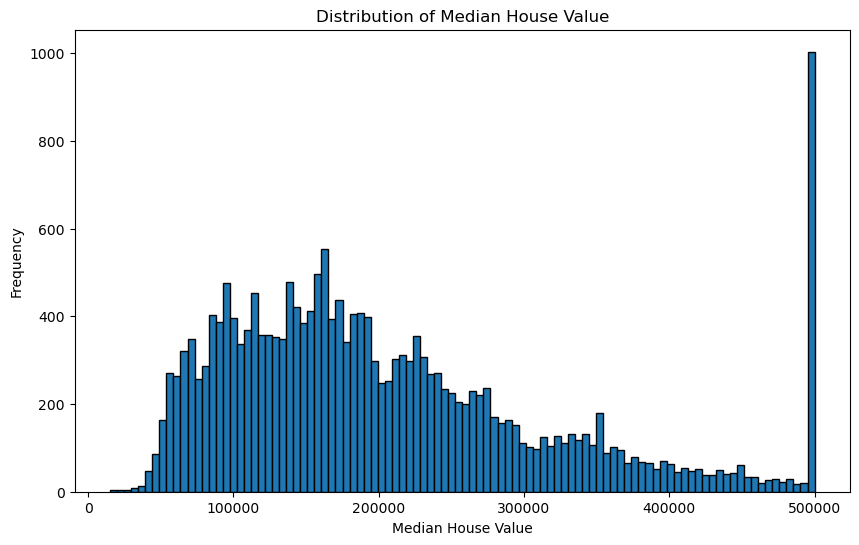

In [195]:
# Plot the histogram for "median_house_value" with 100 bins
plt.figure(figsize=(10, 6))
plt.hist(df["median_house_value"], bins=100, edgecolor="black")

# Labels and title
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")

plt.show()

2. Check out what variables correlates the most with "median house value"

median_house_value          1.000000
median_income               0.688613
rooms_per_household         0.156575
total_rooms                 0.133377
housing_median_age          0.106406
households                  0.065065
total_bedrooms              0.049770
population_per_household   -0.023639
population                 -0.025152
longitude                  -0.045373
latitude                   -0.144860
bedrooms per room          -0.255853
Name: median_house_value, dtype: float64


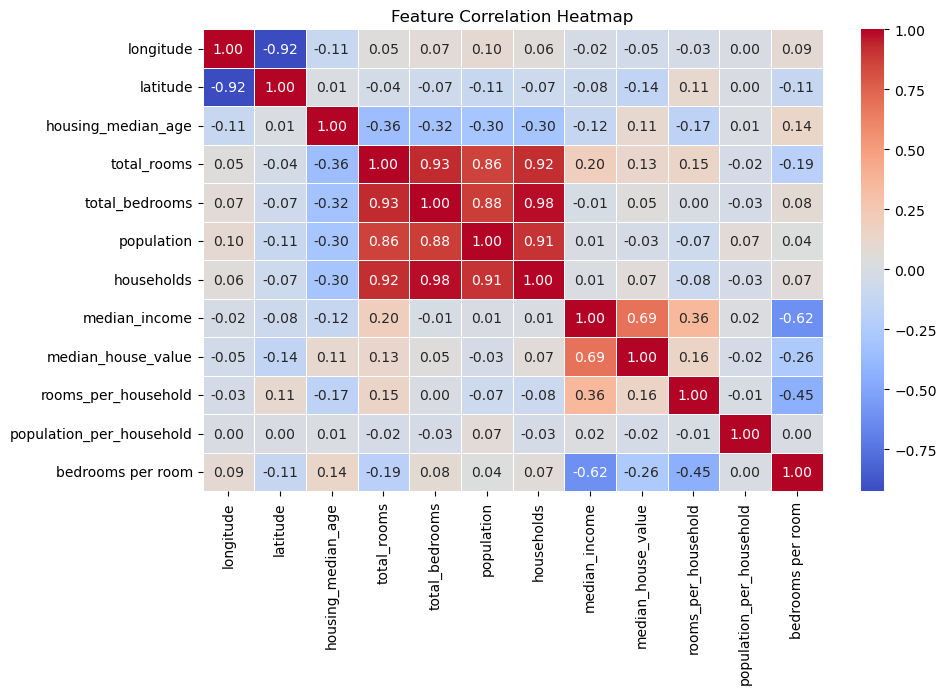

In [196]:
# Exclude Non-Numeric Columns from Correlation 
# We did the step because we have a stupid column "ocean_proximity" (so mad because i stocked with an error for almost one hour) 
correlation_matrix = df.select_dtypes(include=['number']).corr()
correlation_with_target = correlation_matrix["median_house_value"].sort_values(ascending=False)
print(correlation_with_target)
# a nice Heatmap for Numeric Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

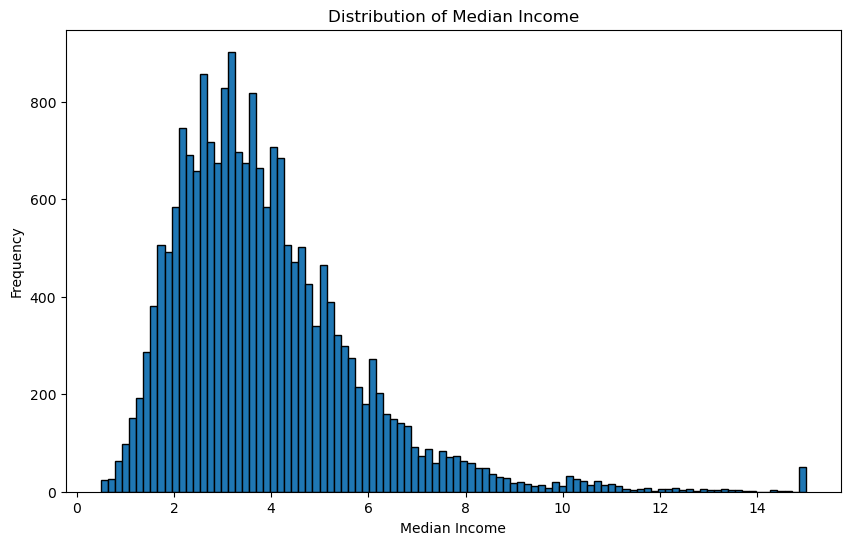

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["median_income"], bins=100, edgecolor="black")

plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.title("Distribution of Median Income")

plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

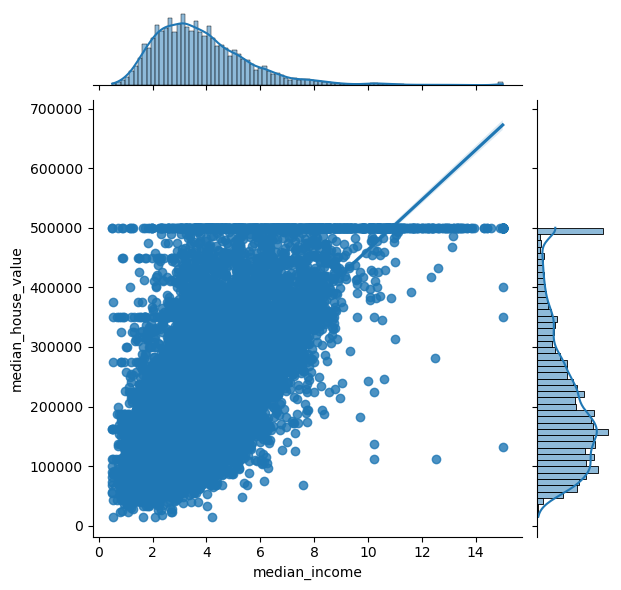

In [198]:
sns.jointplot(x="median_income", y="median_house_value", data=df, kind="reg")

plt.show()

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

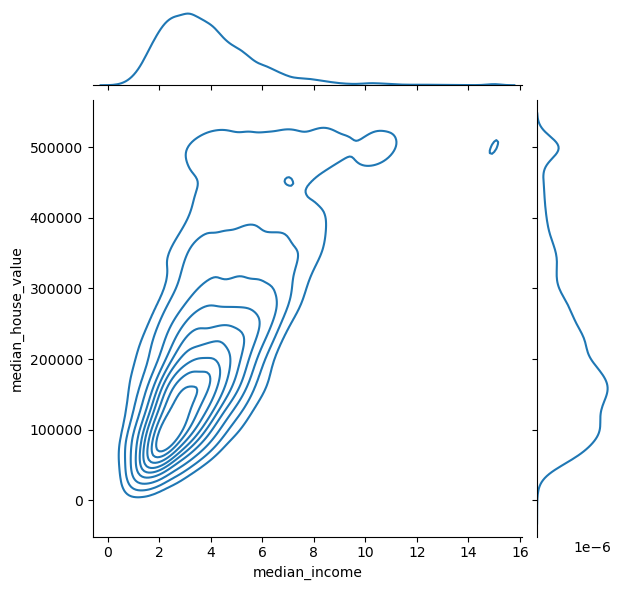

In [199]:
sns.jointplot(x="median_income", y="median_house_value", data=df, kind="kde")

plt.show()

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [200]:
quantiles = [0, 0.25, 0.5, 0.75, 0.95, 1]

# Define labels
labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]

# Create the new categorical column based on "median_income"
df["income_cat"] = pd.qcut(df["median_income"], q=quantiles, labels=labels)

# Check the distribution
print(df["income_cat"].value_counts())
df

income_cat
Above_Average    5109
Low              5108
Below_Average    5108
High             4085
Very High        1022
Name: count, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms per room,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892,Low


ab2. Using the Seorn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

<Axes: xlabel='income_cat', ylabel='count'>

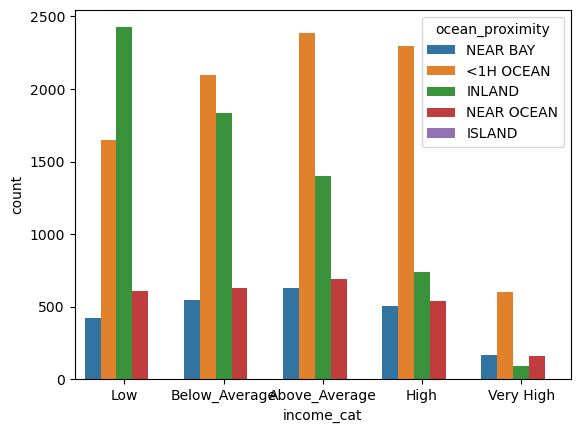

In [211]:
import seaborn as sns
sns.countplot(x ="income_cat", hue = "ocean_proximity", data = df)

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [201]:
import scipy.stats as stats

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

4. Save our predicting variable to `y`.

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [202]:
from sklearn import metrics

#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

2. Print the mean_squared_error and R^2-score again. What has happened?

3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [203]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.